In [23]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [15]:
param_file = '../parameter_estimation/ihart_famsize_ind_pass_params.json'
family_sizes = [3, 4, 5, 6]

In [5]:
with open(param_file, 'r') as f:
    params = json.load(f)

In [36]:
sample_to_famkey = dict()
parents = set()
for k in params.keys():
    if '.' in k:
        pieces = k.split('.')
        if pieces[3] == '3' and pieces[0] != 'AU1325':
            sample_to_famkey[pieces[-1]] = pieces[:3]
            parents.add(pieces[1])
            parents.add(pieces[2])
samples = sorted(sample_to_famkey.keys())
is_parent = np.array([s in parents for s in samples])

In [22]:
preds = ['0/0', '0/1', '1/1', '-/0', '-/1', '-/-']
obss = ['0/0', '0/1', '1/1', './.']

error_rates = np.zeros((len(samples), len(family_sizes), len(preds), len(obss)))

for i, sample in enumerate(samples):
    famkey = sample_to_famkey[sample]
    for j, famsize in enumerate(family_sizes):
        for k, pred in enumerate(preds):
            for l, obs in enumerate(obss):
                error_rates[i, j, k, l] = params['%s.%d.%s.%s.%s' % ('.'.join(famkey), famsize, famkey[1], famkey[2], sample)]['-log10(P[obs=%s|true_gen=%s])' % (obs, pred)]
    

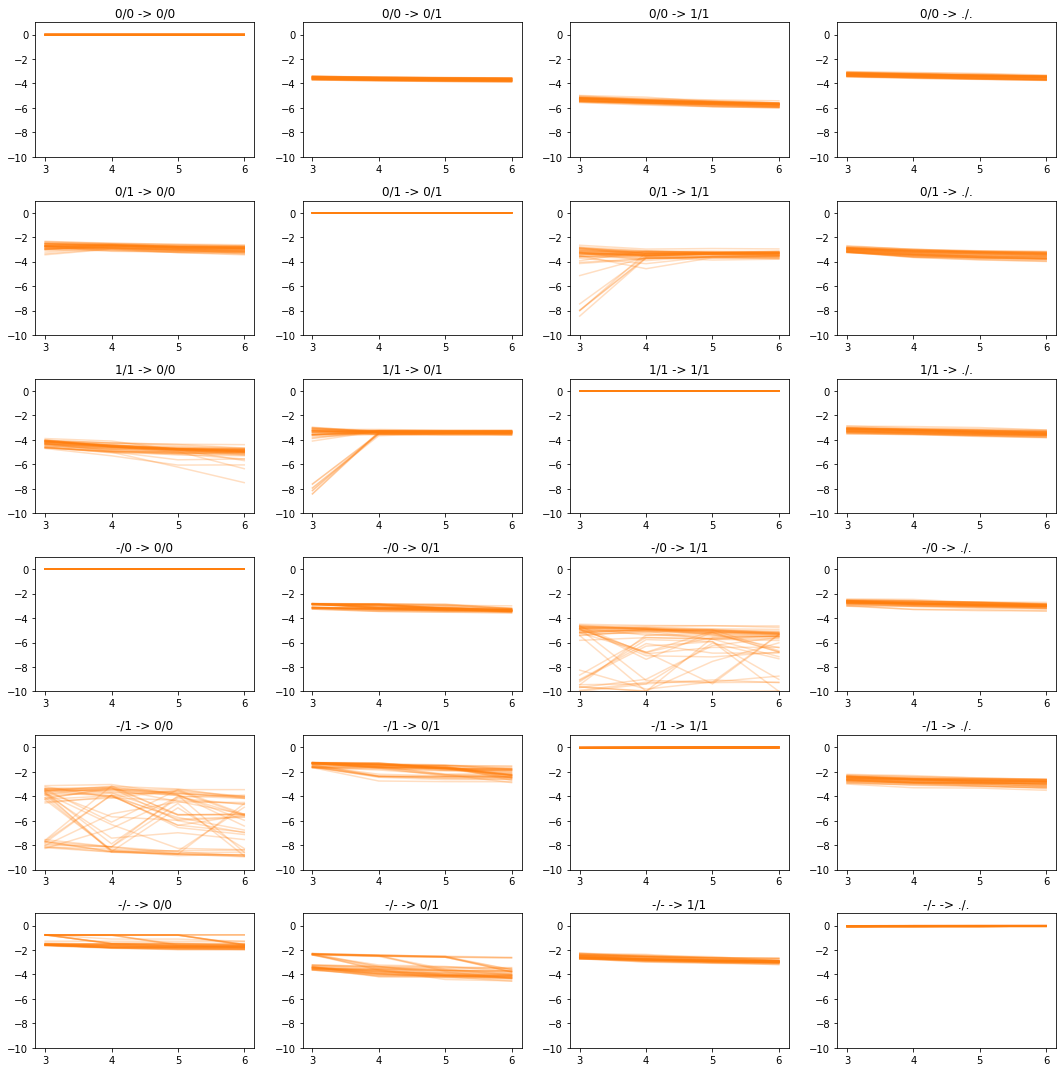

In [38]:
plt.figure(figsize=(15, 15))

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

for i, pred in enumerate(preds):
    for j, obs in enumerate(obss):
        plt.subplot(len(preds), len(obss), i*len(obss) + j + 1)
        #plt.plot(-error_rates[is_parent, :, i, j].T, alpha=0.25, color=colors[0])
        plt.plot(-error_rates[~is_parent, :, i, j].T, alpha=0.25, color=colors[1])
        plt.title('%s -> %s' % (pred, obs))
        plt.ylim([-10, 1])
        plt.xticks(range(len(family_sizes)), family_sizes)
        
plt.tight_layout()
plt.show()